In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.constraints import max_norm, MinMaxNorm

Using TensorFlow backend.


In [4]:
def func(x):
    return x**2

Xtest = np.arange(0, 1, 0.01)
Ytest = func(Xtest)

Xlearn = np.random.sample([200])
Ylearn = func(Xlearn) + 0.01*np.random.normal(0,1,len(Xlearn))

### Using Keras, with Multi layer perceptrons

In [6]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [7]:
nepoch = 100
nbatch = 10
model.fit(Xlearn, Ylearn, epochs=nepoch, batch_size=nbatch)


Epoch 1/100
200/200 [==============================] - 1s 7ms/step - loss: 0.1281 - mean_squared_error: 0.1281
Epoch 2/100
200/200 [==============================] - 0s 410us/step - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 3/100
200/200 [==============================] - 0s 330us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 4/100
200/200 [==============================] - 0s 330us/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 5/100
200/200 [==============================] - 0s 485us/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 6/100
200/200 [==============================] - 0s 420us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 7/100
200/200 [==============================] - 0s 370us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 8/100
200/200 [==============================] - 0s 355us/step - loss: 0.0045 - mean_squared_error: 0.0045
Epoch 9/100
200/200 [==============================] - 0s 370us/step - loss: 0.0062 - mean_square

200/200 [==============================] - 0s 410us/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 72/100
200/200 [==============================] - 0s 840us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 73/100
200/200 [==============================] - 0s 785us/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 74/100
200/200 [==============================] - 0s 395us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 75/100
200/200 [==============================] - 0s 365us/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 76/100
200/200 [==============================] - 0s 350us/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 77/100
200/200 [==============================] - 0s 245us/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 78/100
200/200 [==============================] - 0s 270us/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 79/100
200/200 [==============================] - 0s 290us/step - loss: 0.0016 - mean_squared_e

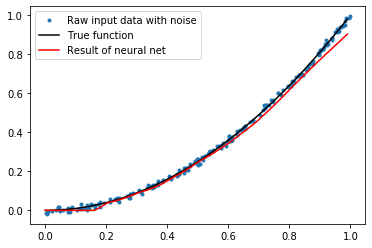

In [8]:
Ylearned = model.predict(Xtest)

plt.plot(Xlearn, Ylearn, '.', label='Raw input data with noise')
plt.plot(Xtest,Ytest, label='True function', c='black')
plt.plot(Xtest, Ylearned, label='Result of neural net', c='red')
plt.legend()

### Implement constraints for weights and bias

In [9]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu', kernel_constraint = MinMaxNorm(-1, 1)))
model.add(Dense(64, activation='relu', kernel_constraint = MinMaxNorm(-1, 1)))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_constraint = MinMaxNorm(-1, 1)))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1, activation='relu', kernel_constraint = MinMaxNorm(-1, 1)))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [11]:
nepoch = 100
nbatch = 10
model.fit(Xlearn, Ylearn, epochs=nepoch, batch_size=nbatch)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 2/100
200/200 [==============================] - 0s 255us/step - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 3/100
200/200 [==============================] - 0s 235us/step - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 4/100
200/200 [==============================] - 0s 250us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 5/100
200/200 [==============================] - 0s 315us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 6/100
200/200 [==============================] - 0s 260us/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 7/100
200/200 [==============================] - 0s 215us/step - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 8/100
200/200 [==============================] - 0s 230us/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 9/100
200/200 [==============================] - 0s 215us/step - loss: 0.0076 - mean_squared

200/200 [==============================] - 0s 250us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 73/100
200/200 [==============================] - 0s 240us/step - loss: 0.0033 - mean_squared_error: 0.0033  
Epoch 74/100
200/200 [==============================] - 0s 200us/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 75/100
200/200 [==============================] - 0s 200us/step - loss: 0.0018 - mean_squared_error: 0.0018  
Epoch 76/100
200/200 [==============================] - 0s 200us/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 77/100
200/200 [==============================] - 0s 210us/step - loss: 0.0020 - mean_squared_error: 0.0020  
Epoch 78/100
200/200 [==============================] - 0s 205us/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 79/100
200/200 [==============================] - 0s 215us/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 80/100
200/200 [==============================] - 0s 195us/step - loss: 0.0025 - mean_squ

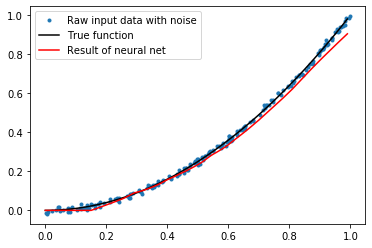

In [15]:
Ylearned = model.predict(Xtest)

plt.plot(Xlearn, Ylearn, '.', label='Raw input data with noise')
plt.plot(Xtest,Ytest, label='True function', c='black')
plt.plot(Xtest, Ylearned, label='Result of neural net', c='red')
plt.legend()